In [14]:
import numpy as np

X = []
Y = []

for line in open("./iris/iris.data", "r"):
    line = line.strip()
    if line =="": continue
    *x, y = line.split(",")
    x = [float(i) for i in x]

    X.append(x)
    Y.append(y)

labels = list(set(Y))
Y = [labels.index(i) for i in Y]

X = np.array(X)
Y = np.array(Y)

print(X)
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

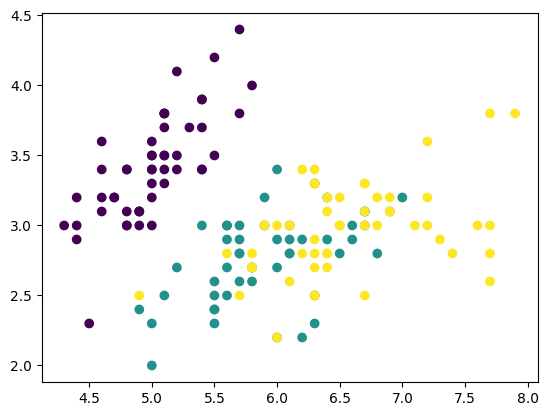

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], c=Y)

In [16]:
class KNNClassifier:
    def __init__(self, k) -> None:
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.Y = y

    def predict(self, queries):
        Y = []
        for q in queries:
            dists = np.linalg.norm(self.X - q, axis=1)
            knns = np.argsort(dists)[:self.k]
            counts = np.bincount(self.Y[knns])
            Y.append(np.argmax(counts))
        
        return np.array(Y)

In [17]:
perm = np.random.permutation(len(X))

Xrand = X[perm]
Yrand = Y[perm]

n_trains = int(0.8*len(X))
X_train = Xrand[:n_trains]
Y_train = Yrand[:n_trains]

X_test = Xrand[n_trains:]
Y_test = Yrand[n_trains:]

knn = KNNClassifier(5)
knn.fit(X_train, Y_train)

train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

print("train accuracy: ", (train_pred==Y_train).mean())
print("test accuracy: ", (test_pred == Y_test).mean())

train accuracy:  0.9583333333333334
test accuracy:  1.0


In [18]:
def cross_val_score(knn, X, Y, cv):
    n = len(X)
    perm = np.random.permutation(n)
    X = X[perm]
    Y = Y[perm]
    scores = []

    for i in range(cv):
        start = i * n // cv
        end = (i+1) * n // cv
        X_train = np.concatenate([X[:start], X[end:]])
        Y_train = np.concatenate([Y[:start], Y[end:]])
        X_test = X[start:end]
        Y_test = Y[start:end]

        knn.fit(X_train, Y_train)
        pred = knn.predict(X_test)
        scores.append((pred == Y_test).mean())
    
    return np.array(scores)

knn = KNNClassifier(6)
scores = cross_val_score(knn, X, Y, 10)
print(scores.mean())

0.96


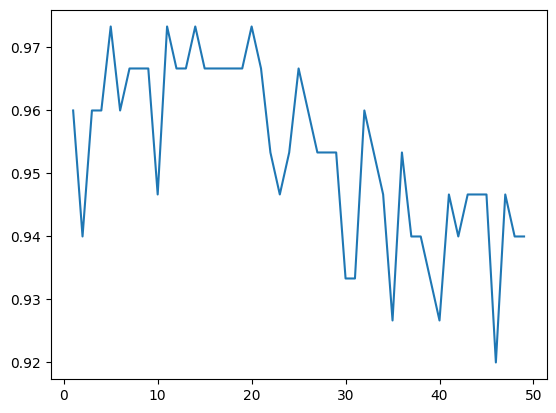

In [19]:
scores = []
test_scores = []

for k in range(1, 50):
    knn = KNNClassifier(k)
    score = cross_val_score(knn, X, Y, 10).mean()
    scores.append(score)

plt.plot(range(1, 50), scores)
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("train accuracy:", accuracy_score(y_train_pred, y_train))
print("test accuracy:", accuracy_score(y_test_pred, y_test))

train accuracy: 0.9583333333333334
test accuracy: 0.9666666666666667


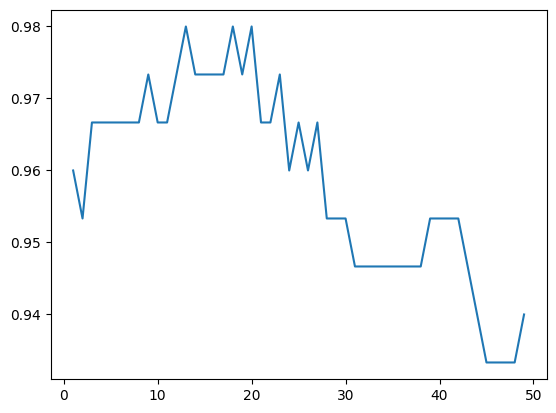

In [21]:
from sklearn.model_selection import cross_val_score

scores = []

for k in range(1,50):
   knn = KNeighborsClassifier(n_neighbors=k)
   score = cross_val_score(knn, X, Y, cv=10, scoring="accuracy").mean()
   scores.append(score)
   
plt.plot(range(1, 50), scores)
plt.show()


In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터셋 로드
iris = load_iris()
X, y = iris.data, iris.target

# K 값 범위 설정
k_values = range(1, 50)
cv_scores = []

# 5-fold 교차 검증을 통해 최적의 K 값을 찾음
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# 최적의 K 값 출력
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"최적의 K 값은 {optimal_k}입니다.")


최적의 K 값은 6입니다.


In [27]:
def jaccard_distance(set1, set2):
    # 교집합 계산
    intersection = len(set1.intersection(set2))
    # 합집합 계산
    union = len(set1.union(set2))
    # 자카드 거리 계산
    return 1 - intersection / union

# 예시 사용
set1 = {1, 2, 3, 4}
set2 = {3, 4, 5, 6}

distance = jaccard_distance(set1, set2)
print(f"Jaccard Distance: {distance}")


Jaccard Distance: 0.6666666666666667
